# 💠Random Forest 💠

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

## 💠Exploratory Data Analysis (EDA)

In [2]:
data=pd.read_excel('glass.xlsx',sheet_name='glass')
print('Shape of data ',data.shape)
data.head()

Shape of data  (214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
print('Number of duplicate records ',data.duplicated().sum())
data=data.drop_duplicates()
print('Number of duplicate records ',data.duplicated().sum())

Number of duplicate records  1
Number of duplicate records  0


## 💠Data Visualization

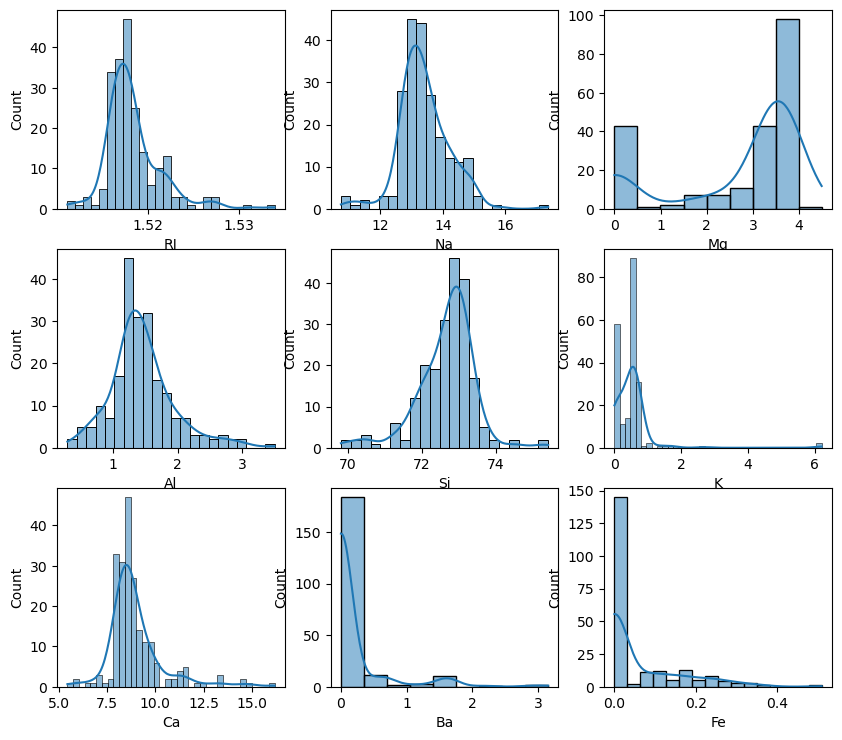

In [5]:
plt.figure(figsize=(10,15))
for x,y in enumerate(data.columns[:len(data.columns)-1]):
    plt.subplot(5,3,x+1)
    sns.histplot(data[y],kde=True)
plt.show()

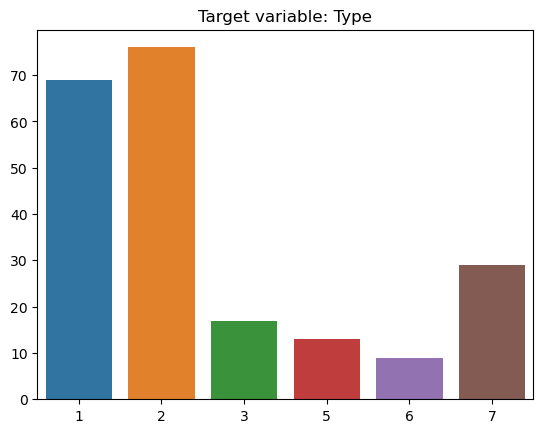

In [6]:
d=data['Type'].value_counts()
sns.barplot(x=d.index,y=d.values)
plt.title('Target variable: Type')
plt.show()

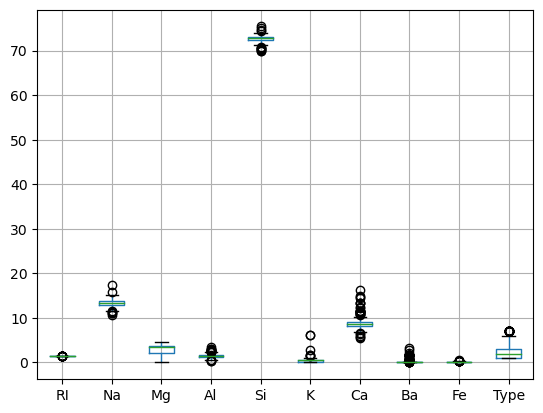

In [7]:
data.boxplot()
plt.show()

## 💠Data Preprocessing
#### Note: There is no need for standardization or normalization as RandomForest and XGboost do not use any mathematical instead they segregate the points.

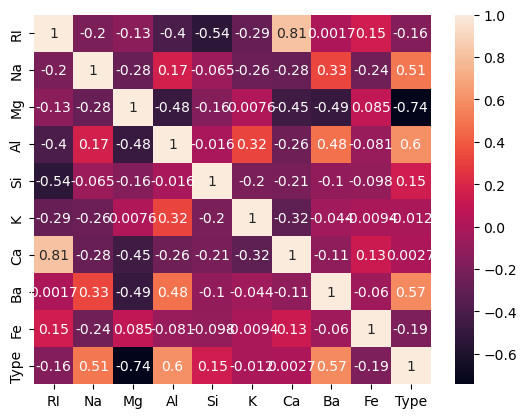

In [8]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [9]:
X=data[['RI', 'Na', 'Mg', 'Al', 'Si', 'Ba', 'Fe']]
Y=data['Type']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

print('▶Shape of X_train,y_train',(X_train.shape,y_train.shape))
print('▶Shape of X_test,y_test',(X_test.shape,y_test.shape))

▶Shape of X_train,y_train ((170, 7), (170,))
▶Shape of X_test,y_test ((43, 7), (43,))


▶Shape of X_train,y_train ((366, 7), (366,))
6    61
2    61
1    61
7    61
5    61
3    61
Name: Type, dtype: int64


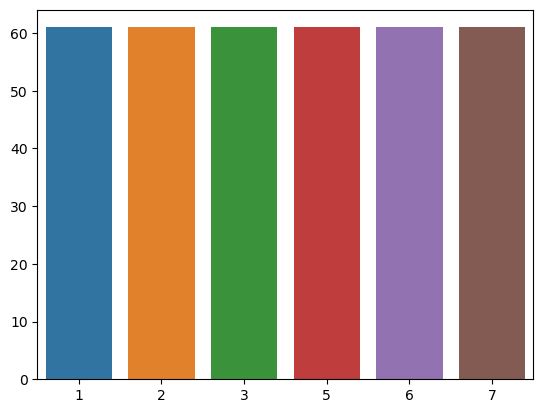

In [10]:
SM=SMOTE(random_state=42)
X_train_sm,y_train_sm=SM.fit_resample(X_train,y_train)
print('▶Shape of X_train,y_train',(X_train_sm.shape,y_train_sm.shape))

print(y_train_sm.value_counts())
sns.barplot(x=y_train_sm.value_counts().index,y=y_train_sm.value_counts().values)
plt.show()

## 💠Random Forest Model Implementation

In [11]:
Bagging_model=RandomForestClassifier(n_estimators=10,max_depth=8,min_samples_split=35,min_samples_leaf=4,random_state=100)
Bagging_model.fit(X_train_sm,y_train_sm)

Y_predict=Bagging_model.predict(X_train_sm)
y_predict=Bagging_model.predict(X_test)

print('Accuracy on training data ',accuracy_score(y_train_sm,Y_predict))
print('Accuracy on testing data ',accuracy_score(y_test,y_predict))

Accuracy on training data  0.8633879781420765
Accuracy on testing data  0.7209302325581395


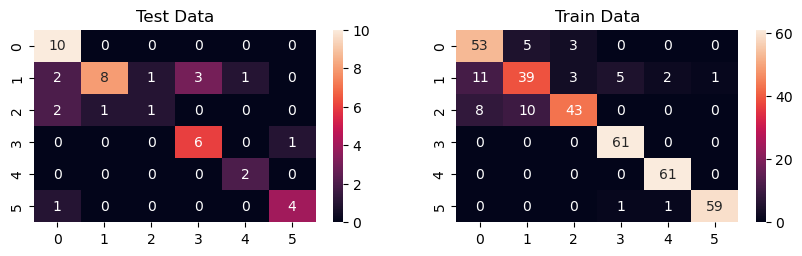

In [12]:
cm=confusion_matrix(y_test,y_predict)
CM=confusion_matrix(y_train_sm,Y_predict)

plt.figure(figsize=(10,2.5))

plt.subplot(1,2,1)
sns.heatmap(cm,annot=True)
plt.title('Test Data')

plt.subplot(1,2,2)
sns.heatmap(CM,annot=True)
plt.title('Train Data')

plt.show()

## 💠GradientBoostingClassifier  Model Implementation

In [13]:
Boosting_model=GradientBoostingClassifier(n_estimators=15,subsample=0.5,max_depth=4,min_samples_split=40,min_samples_leaf=4)
Boosting_model.fit(X_train_sm,y_train_sm)

Y_predict=Boosting_model.predict(X_train_sm)
y_predict=Boosting_model.predict(X_test)

print('Accuracy on training data ',accuracy_score(y_train_sm,Y_predict))
print('Accuracy on testing data ',accuracy_score(y_test,y_predict))

Accuracy on training data  0.912568306010929
Accuracy on testing data  0.7441860465116279


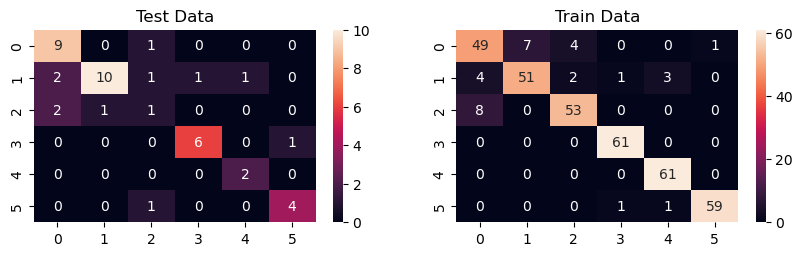

In [14]:
cm=confusion_matrix(y_test,y_predict)
CM=confusion_matrix(y_train_sm,Y_predict)

plt.figure(figsize=(10,2.5))

plt.subplot(1,2,1)
sns.heatmap(cm,annot=True)
plt.title('Test Data')

plt.subplot(1,2,2)
sns.heatmap(CM,annot=True)
plt.title('Train Data')

plt.show()

### 🚩Note: 
#### By refering to accuracy_score it seems like it is overfitting but the confusion_matrix clears that it is due to the difference in shape of training and testing data due to SMOTE.

## 💠Additional Notes:

### 1.Explain Bagging and Boosting methods. How is it different from each other.
####             Bagging, or bootstrap aggregating, is a machine learning technique that combines multiple models to improve the accuracy and stability of predictions. It's a type of ensemble learning that's especially effective at reducing variance and overfitting.For classification it takes mode of outputs while for regression it takes mean of all the outputs from models.
####             Boosting is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers. It is done by building a model by using weak models in series. Firstly, a model is built from the training data. Then the second model is built which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models are added. 
#### Differences:
▶Data partition: Bagging uses random bags of data for each model, while boosting focuses on misclassified data from previous models.

▶Models: Bagging creates independent models that are aggregated together, while boosting updates existing models with new ones.

▶Goal: Bagging aims to reduce variance, while boosting aims to reduce bias.

### 2. Explain how to handle imbalance in the data.
####  1. Resampling techniques
Resampling techniques involve modifying the original dataset to balance the class distribution. This can be done by either oversampling(SMOTE) the minority class or undersampling(RandomUnderSampler) the majority class.
#### 2. Data augmentation
Data augmentation involves creating additional data points by modifying existing data. This can be done by applying various transformations such as rotations, translations, and flips to the existing data.
#### 3. Ensemble techniques
Ensemble techniques involve combining multiple models to improve performance. This can be done by using techniques such as bagging, boosting, and stacking.
#### 4. One-class classification
One-class classification involves training a model on only one class and then using it to identify data points that do not belong to that class. This can be useful for identifying anomalies and outliers in the data.